# Install libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# clone hifuku
parent_dir = '/content/drive/MyDrive' # install location
%cd $parent_dir
!git clone https://github.com/onnonuro/hifuku.git

/content/drive/MyDrive
Cloning into 'hifuku'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 124 (delta 50), reused 99 (delta 32), pack-reused 0
Receiving objects: 100% (124/124), 21.03 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (50/50), done.
fatal: cannot exec '/content/drive/MyDrive/hifuku/.git/hooks/post-checkout': Permission denied
Encountered 2 file(s) that should have been pointers, but weren't:
	data/.DS_Store
	data/graphical_abstract.jpg


In [3]:
# install required dependencies.
root = f'{parent_dir}/hifuku'
%cd $root
!pip install -e .

/content/drive/MyDrive/hifuku
Obtaining file:///content/drive/MyDrive/hifuku
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=99507774ef1ca7143666deebc145c331e7e192a0f71793b1cd63d37559ec592d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60944 sha256=2b78

In [1]:
# Importing necessary libraries and modules for data handling, visualization, and mathematical operations.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
from glob import glob
import time

import csv
import os.path
from pathlib import Path
import random
import math
import warnings
warnings.simplefilter('ignore')

import cv2
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000
from PIL import Image

import joblib
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from scipy import stats
import ast
from scipy.spatial import distance
# from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.stats import entropy
from sklearn.neighbors import KernelDensity

from shapely.geometry import Polygon
from tqdm import tqdm

import hifuku

import torch

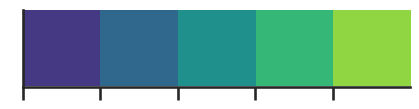

In [2]:
# Setting up a color palette for plots and initializing seaborn

palette = sns.color_palette('viridis', n_colors=5)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})

sns.palplot(palette)
colors = [(int(color[0]*255), int(color[1]*255), int(color[2]*255)) for color in palette]

# Set a sample image for analysis

In [ ]:
parent_dir = '/Users/M286333/Documents/_projects/mmmetry'
root = f'{parent_dir}/hifuku'

In [6]:
# Set a sample Whole Slide Image (WSI) for analysis.
is_wsi = True  # Indicates if the image is a WSI.
path = f'{root}/data/sample_wsi_scale_0273.jpg'
scale = 0.2730  # Scale in µm/pixel for the WSI.

# If you want to analyse a non-WSI image, uncomment and adjust the following lines:
# is_wsi = False
# path = f'{root}/data/sample_scale_02325.jpg'
# scale = 0.2325  # Scale in µm/pixel for non-WSI images.

image_id = os.path.splitext(os.path.splitext(os.path.basename(path))[0])[0]  # Extracting the image ID from the path.
save_dir = f'{root}/results/{image_id}'  # Directory to save results.
image_id

'sample_wsi_scale_0273'

# Run Hifuku

In [7]:
# Execute Hifuku
start_time = time.time()
hifuku.main(root, path, is_wsi=is_wsi, scale=scale)
end_time = time.time()

# Calculate the total time taken
elapsed_time = int(end_time - start_time)
print(f"The analysis took {elapsed_time} seconds.")

Output hidden; open in https://colab.research.google.com to view.

# See results

In [8]:
# Load and display the nerve data results as a DataFrame.
df_nerve = pd.read_csv(f'{root}/results/{image_id}/data_nerve.csv', index_col=0)
df_nerve

,id,is_wsi,x_px,y_px,scale,total_fas,n_fibers,total_area,total_density,std_density
0,sample_wsi_scale_0273,True,7813,7863,0.273,10,4149,0.584184,7102.212382,1020.982469


In [9]:
# Load and display the fascicle data results.
df_fas = pd.read_csv(f'{root}/results/{image_id}/data_fas.csv', index_col=0)
df_fas

,n_fas,n_fib,area,density
0,0,377,0.050907,7405.656438
1,1,1122,0.184483,6081.859561
2,2,942,0.139781,6739.113196
3,3,532,0.064377,8263.788087
4,4,363,0.043126,8417.228678
5,5,126,0.015316,8226.686951
6,6,166,0.023076,7193.631336
7,7,340,0.036316,9362.157171
8,8,104,0.016305,6378.525240
9,9,77,0.010497,7335.507475


In [10]:
# Load the fiber data results and rename a column for clarity.
df_fib = pd.read_csv(f'{root}/results/{image_id}/data_fib.csv', index_col=0)
df_fib = df_fib.rename(columns={'diameter_out': 'diameter'})
df_fib

,area_out,area_in,perimeter,circularity,convexity,solidity,eccentricity,major_axis_length,minor_axis_length,angle,diameter,diameter_in,thickness,g_ratio,n_fas,xmin,ymin,xmax,ymax
0,9.177501,4.409136,277.663994,0.501776,0.807104,0.843078,1.294635,4.186858,3.234008,69.524261,3.418356,2.369364,0.524496,0.693130,0.0,192.137931,141.176471,211.448276,160.941176
1,8.824234,4.611855,224.793938,0.736092,0.932312,0.939384,1.651871,4.397349,2.662042,54.478050,3.351919,2.423220,0.464350,0.722935,0.0,177.655172,176.941176,198.896552,195.764706
2,99.494724,36.428285,738.967596,0.768022,0.925622,0.978409,1.550960,14.059230,9.064856,73.915138,11.255248,6.810428,2.222410,0.605089,0.0,246.206897,91.294118,302.206897,133.647059
3,18.757459,9.845281,385.989896,0.530697,0.803446,0.881232,1.244703,5.753051,4.622028,134.623611,4.886997,3.540537,0.673230,0.724481,0.0,371.724138,56.470588,397.793103,81.882353
4,77.094288,17.812431,774.139170,0.542261,0.793482,0.943762,1.624028,12.721752,7.833454,77.065353,9.907547,4.762299,2.572624,0.480674,0.0,357.241379,85.647059,411.310345,125.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4144,4.623779,0.830253,216.024385,0.417653,0.875822,0.765926,2.689796,4.625767,1.719746,5.720507,2.426351,1.028159,0.699096,0.423747,9.0,349.846154,321.230769,364.615385,345.230769
4145,46.461379,14.589797,497.587875,0.791001,0.938955,0.972058,1.493823,9.490231,6.352982,105.119682,7.691324,4.310024,1.690650,0.560375,9.0,420.000000,267.692308,460.615385,298.153846
4146,47.404916,17.158066,508.031525,0.774224,0.929947,0.959627,1.393818,9.291308,6.666084,97.601677,7.769029,4.674006,1.547512,0.601620,9.0,420.923077,236.307692,460.615385,268.615385
4147,4.960650,NaN,186.852812,0.598913,0.877137,0.896310,1.630399,3.346311,2.052450,97.696960,2.513184,NaN,NaN,NaN,9.0,427.384615,230.769231,446.769231,245.538462


(-0.5, 7862.5, 7812.5, -0.5)

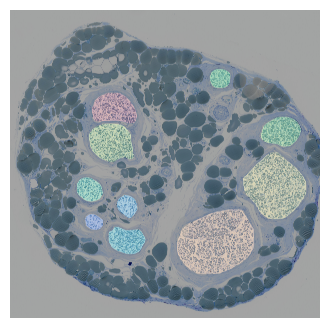

In [11]:
# Display a nerve with detected fascicles masked.
img = Image.open(f'{save_dir}/masked_fascicles.jpg')
plt.imshow(img, aspect='auto')
plt.axis('off')

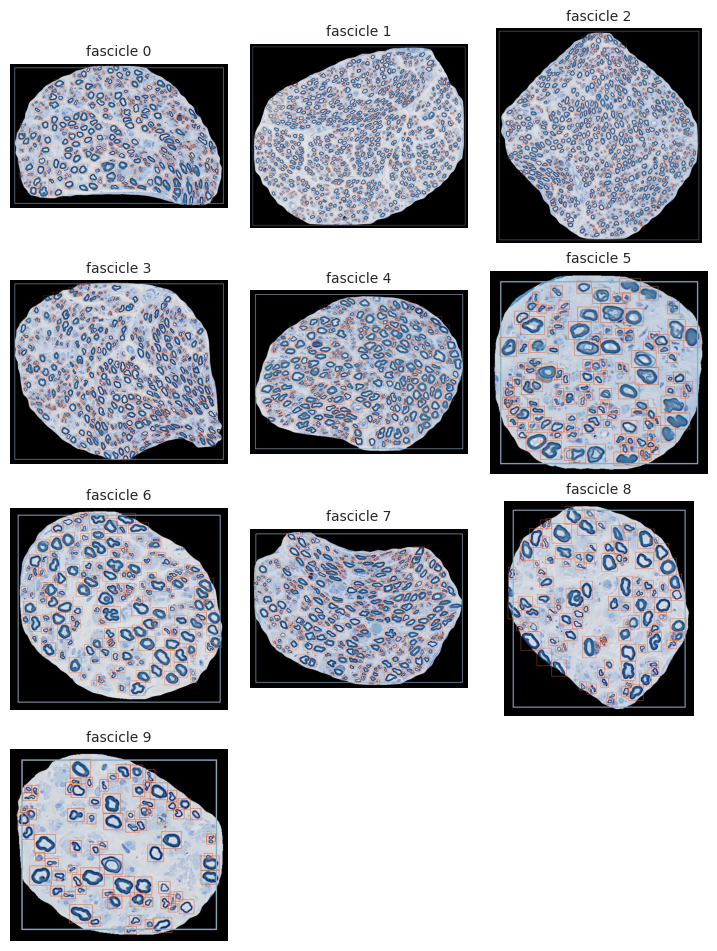

In [12]:
# Display individual fascicle images with detected fibers (orange rectangles).
col = 3
row = len(df_fas)//col + 1
plt.figure(figsize=(col*3, row*3))
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for num in range(len(df_fas)):
    plt.subplot(row, col, num+1)
    img = Image.open(f'{save_dir}/fascicles/fascicle_{num:03}_bbox.jpg')
    plt.imshow(img)
    plt.title(f'fascicle {num}', fontsize=10)
    plt.axis('off')

# Exclude improperly detected fascicle(s), if present.

In [13]:
# After reviewing the above image, exclude any incorrectly deleted fascicle(s).
fas_to_remove = [] # fill number(s) of the fascicle you want to exclude. Ex. fas_to_remove = [7, 9]
df_fib_rm = df_fib[~df_fib['n_fas'].isin(fas_to_remove)].dropna(axis=0)
df_fib_rm

,area_out,area_in,perimeter,circularity,convexity,solidity,eccentricity,major_axis_length,minor_axis_length,angle,diameter,diameter_in,thickness,g_ratio,n_fas,xmin,ymin,xmax,ymax
0,9.177501,4.409136,277.663994,0.501776,0.807104,0.843078,1.294635,4.186858,3.234008,69.524261,3.418356,2.369364,0.524496,0.693130,0.0,192.137931,141.176471,211.448276,160.941176
1,8.824234,4.611855,224.793938,0.736092,0.932312,0.939384,1.651871,4.397349,2.662042,54.478050,3.351919,2.423220,0.464350,0.722935,0.0,177.655172,176.941176,198.896552,195.764706
2,99.494724,36.428285,738.967596,0.768022,0.925622,0.978409,1.550960,14.059230,9.064856,73.915138,11.255248,6.810428,2.222410,0.605089,0.0,246.206897,91.294118,302.206897,133.647059
3,18.757459,9.845281,385.989896,0.530697,0.803446,0.881232,1.244703,5.753051,4.622028,134.623611,4.886997,3.540537,0.673230,0.724481,0.0,371.724138,56.470588,397.793103,81.882353
4,77.094288,17.812431,774.139170,0.542261,0.793482,0.943762,1.624028,12.721752,7.833454,77.065353,9.907547,4.762299,2.572624,0.480674,0.0,357.241379,85.647059,411.310345,125.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4143,32.236774,11.243445,418.374671,0.776328,0.926527,0.952186,1.208285,7.184906,5.946367,92.972839,6.406648,3.783596,1.311526,0.590573,9.0,264.000000,317.538462,297.230769,346.153846
4144,4.623779,0.830253,216.024385,0.417653,0.875822,0.765926,2.689796,4.625767,1.719746,5.720507,2.426351,1.028159,0.699096,0.423747,9.0,349.846154,321.230769,364.615385,345.230769
4145,46.461379,14.589797,497.587875,0.791001,0.938955,0.972058,1.493823,9.490231,6.352982,105.119682,7.691324,4.310024,1.690650,0.560375,9.0,420.000000,267.692308,460.615385,298.153846
4146,47.404916,17.158066,508.031525,0.774224,0.929947,0.959627,1.393818,9.291308,6.666084,97.601677,7.769029,4.674006,1.547512,0.601620,9.0,420.923077,236.307692,460.615385,268.615385


In [14]:
# Check the number of fibers with diameter equal to or greater than 25, and count any NaN values.
len(df_fib_rm[df_fib_rm['diameter'] >= 25]), df_fib_rm.isna().sum().sum()

(0, 0)

In [15]:
# Remove the specified improperly detected fascicle(s) from the fascicle DataFrame.
df_fas_rm = df_fas[~df_fas['n_fas'].isin(fas_to_remove)]
df_fas_rm

,n_fas,n_fib,area,density
0,0,377,0.050907,7405.656438
1,1,1122,0.184483,6081.859561
2,2,942,0.139781,6739.113196
3,3,532,0.064377,8263.788087
4,4,363,0.043126,8417.228678
5,5,126,0.015316,8226.686951
6,6,166,0.023076,7193.631336
7,7,340,0.036316,9362.157171
8,8,104,0.016305,6378.525240
9,9,77,0.010497,7335.507475


In [16]:
# Create a copy of the nerve DataFrame and calculate fiber density.
df_nerve_rm = df_nerve.copy()
df_nerve_rm['total_fas'] = len(df_fas_rm)
df_nerve_rm['n_fibers'] = df_fas_rm['n_fib'].sum()
df_nerve_rm['total_area'] = df_fas_rm['area'].sum()
df_nerve_rm['total_density'] = df_nerve_rm['n_fibers'] / df_nerve_rm['total_area']
df_nerve_rm['std_density'] = df_fas_rm['density'].std()
df_nerve_rm

,id,is_wsi,x_px,y_px,scale,total_fas,n_fibers,total_area,total_density,std_density
0,sample_wsi_scale_0273,True,7813,7863,0.273,10,4149,0.584184,7102.212382,1020.982469


# Visualize results

In [17]:
# Function to calculate the density of a specific attribute (e.g., diameter or thickness).
def get_density(df, area, name, xlim=20, dev=1):
    idx = []
    density = []
    bins = int(xlim // dev) + 1
    for i in range(bins):
        if i == bins - 1:
            dens = len(df[df[name] >= (i) * dev]) / area
        else:
            dens = len(df[ (df[name] >= (i) * dev) & (df[name] < (i + 1) * dev) ]) / area
        idx.append(i * dev)
        density.append(dens)
    density_df = pd.DataFrame({name: density}, index = idx)
    return density_df


# Function to draw a histogram of a specified attribute using the calculated density data.
def draw_histogram(df, total_area, name='diameter', dev=1.0, width=1, xlim=20, tick=1):
    density = get_density(df, total_area, name=name, xlim=xlim, dev=dev)
    fig, ax = plt.subplots(figsize=(6, 3))

    # ax.set_title(name)
    ax.set_xlim(0, xlim)
    ax.set_xlabel(f'{name} [um]', fontsize=10)
    ax.set_ylabel('Density [/mm2]', fontsize=10)
    ax.set_xticks(np.arange(0, xlim, tick))
    ax.set_xticks(np.arange(0, xlim, dev), minor=True)


    ax.bar(density.index, density[name], width=width, color='teal')
    # ax.bar(density_ref.index+width/2, density_ref[name], width=width, alpha=0.5, color='powderblue')
    # ax.legend(['sample', 'normal 57 y.o. male'])
    plt.savefig(f'{save_dir}/histogram_{name}.jpg')

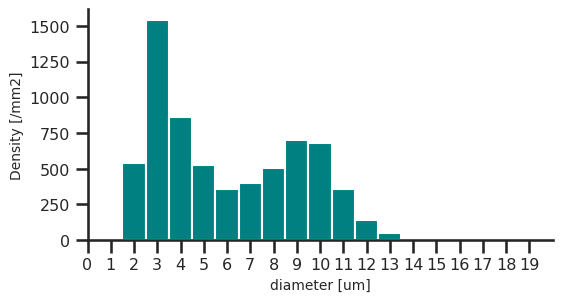

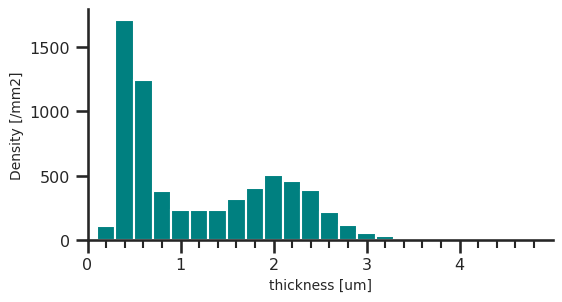

In [18]:
# Calculate the total area and draw histograms for diameter and thickness.
area = df_nerve_rm['total_area'][0]
draw_histogram(df_fib_rm, area, name='diameter', dev=1, width=1, xlim=20, tick=1)
draw_histogram(df_fib_rm, area, name='thickness', dev=0.20, width=0.20, xlim=5, tick=1)

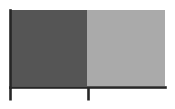

In [19]:
# Set a grayscale color palette for the plots.
palette = sns.color_palette('gray', n_colors=2)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})
sns.palplot(palette)

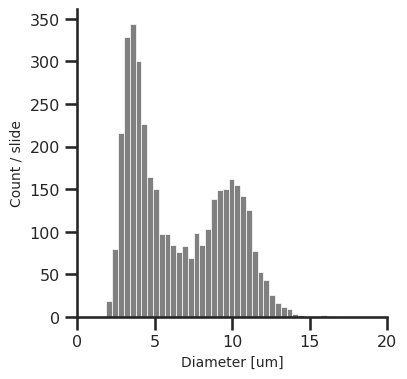

In [20]:
# Plot and save a histogram of the diameter distribution.
sns.histplot(df_fib_rm['diameter'], bins=40)
plt.xlim(0, 20)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_diameter.jpg')

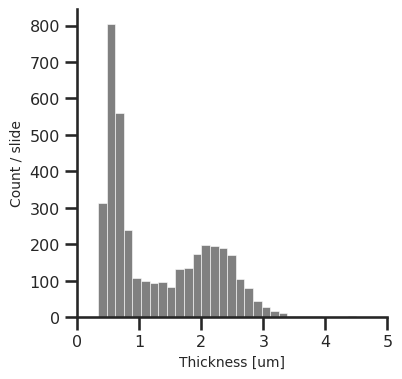

In [21]:
# Plot and save a histogram of the thickness distribution.
sns.histplot(df_fib_rm['thickness'], bins=50)
plt.xlim(0, 5)
plt.xlabel('Thickness [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_thickness.jpg')

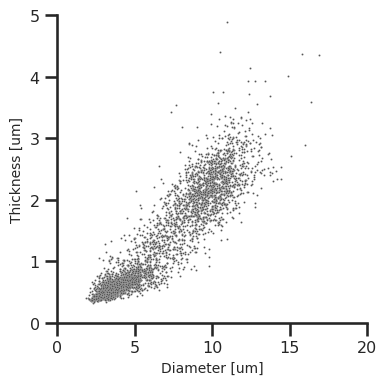

In [22]:
# Plot and save a scatter plot of diameter vs. thickness.
sns.scatterplot(data=df_fib_rm, x='diameter', y='thickness', s=2)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Thickness [um]', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.savefig(f'{save_dir}/scatter_diameter_thickness.jpg')

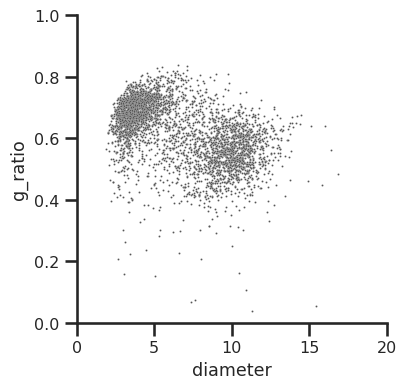

In [23]:
# Plot and save a scatter plot of diameter vs. g-ratio.
sns.scatterplot(data=df_fib_rm, x='diameter', y='g_ratio', s=2)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.savefig(f'{save_dir}/scatter_diameter_g_ratio.jpg')

# Classify large and small fibers with Gaussian Mixture model

In [24]:
# Initialize and load a Gaussian Mixture Model for classification.
gmm = GaussianMixture(n_components=2, covariance_type='tied')
loaded_gmm = joblib.load(f'{root}/weights/gmm_classifier.pkl')
df_fib_rm['gmm'] = loaded_gmm.predict(df_fib_rm[['diameter', 'thickness']])


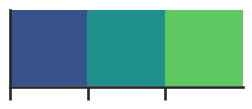

In [25]:
# Setting a color palette for visualizing the classified data.
palette = sns.color_palette('viridis', n_colors=3)
sns.set(context='talk', style='ticks', palette=palette, font_scale=.7,rc={
    'axes.spines.right': False,
    'axes.spines.top': False,
    'figure.figsize': [4.0, 4.0],
    'legend.fancybox': False,
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.frameon': True,
    'legend.handletextpad': 0.5,
    'legend.loc': 'upper right',
    'legend.loc': 'best',
    'legend.title_fontsize': None,
})

sns.palplot(palette)

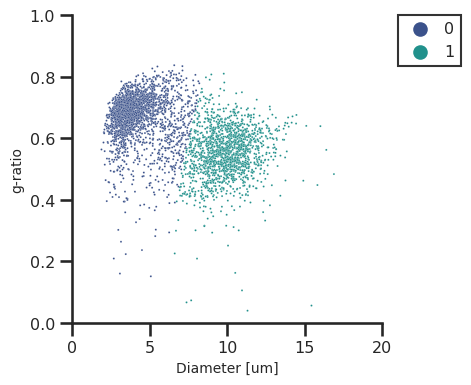

In [26]:
# Plot and save a scatter plot of diameter vs. g-ratio. 0: small fibers, 1: large fibers.
sns.scatterplot(data=df_fib_rm, x='diameter', y='g_ratio', hue='gmm', s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('g-ratio', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 1)
plt.savefig(f'{save_dir}/scatter_diameter_g_ratio_gmm.jpg')

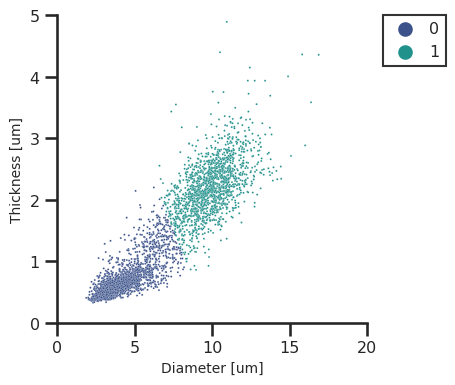

In [27]:
# Plot and save a scatter plot of diameter vs. thickness. 0: small fibers, 1: large fibers.
sns.scatterplot(data=df_fib_rm, x='diameter', y='thickness', hue='gmm', s=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Thickness [um]', fontsize=10)
plt.xlim(0, 20)
plt.ylim(0, 5)
plt.savefig(f'{save_dir}/scatter_diameter_thickness_gmm.jpg')


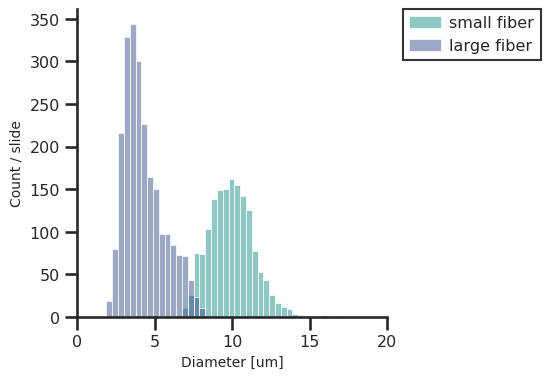

In [28]:
# Plot and save a histogram showing the distribution of fiber diameters, categorized by Gaussian Mixture Model classification.
sns.histplot(data=df_fib_rm, x='diameter', bins=40, hue='gmm')
labels = ['small fiber', 'large fiber']
plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 20)
plt.xlabel('Diameter [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_diameter_gmm.jpg')

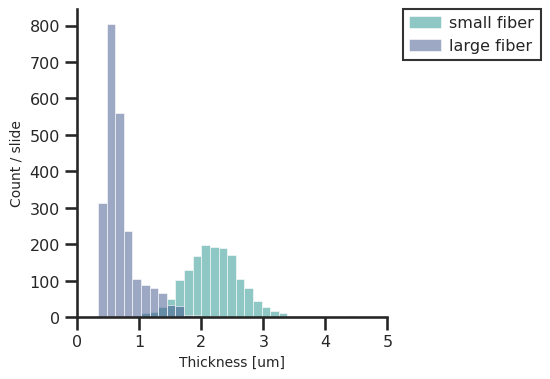

In [29]:
# Plot and save a histogram showing the distribution of fiber thickness, categorized by Gaussian Mixture Model classification.
sns.histplot(data=df_fib_rm, x='thickness', bins=50, hue='gmm')
labels = ['small fiber', 'large fiber']
plt.legend(labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 5)
plt.xlabel('Thickness [um]', fontsize=10)
plt.ylabel('Count / slide', fontsize=10)
plt.savefig(f'{save_dir}/histogram_thickness_gmm.jpg')

# Calculate linear regression

In [30]:
# Function to perform linear regression and plot the relationship between two variables.
def get_linear_regression(df, xlabel='diameter', ylabel='g_ratio'):
    df = df.copy().dropna(subset=(xlabel, ylabel))
    x = df[xlabel].values.reshape(-1, 1)
    y = df[ylabel]
    lr = LinearRegression()
    lr.fit(x, y)
    # r2 = lr.score(x, y)
    coef = lr.coef_
    intercept = lr.intercept_


    sns.jointplot(data=df_fib_rm, x='diameter', xlim=(0, 15), ylim=(0, 1), y='g_ratio', hue='gmm', s=2)
    plt.legend([],[], frameon=False)

    x_ = np.arange(min(df[xlabel]), max(df[xlabel]), 0.1)
    plt.plot(x_, coef*x_+intercept, color='gray', linewidth=2)

    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.xlabel('Diameter [um]', fontsize=10)
    plt.ylabel('g-ratio', fontsize=10)

    plt.savefig(f'{save_dir}/{xlabel}_{ylabel}_lr.jpg')
    print(
        f'coef:{coef[0]:.4f}, intercept:{intercept:.3f}'
    )
    return coef[0], intercept

coef:-0.0158, intercept:0.725


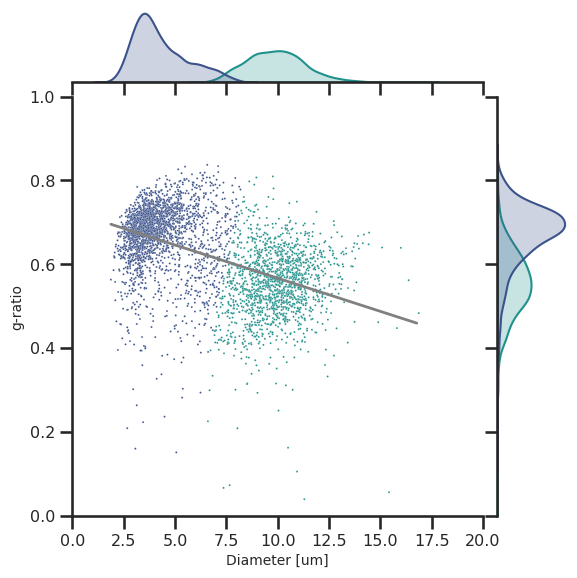

In [31]:
# Run the linear regression function and compute coef and intercept.
df_nerve['coef'], df_nerve['intercept'] = get_linear_regression(df_fib_rm)

# Spatial analysis

Mean Nearest Neighbor Distance: 7.54 um
Entropy: 8.89
Mean Nearest Neighbor Distance: 8.17 um
Entropy: 10.11
Mean Nearest Neighbor Distance: 8.11 um
Entropy: 9.87
Mean Nearest Neighbor Distance: 7.07 um
Entropy: 9.13
Mean Nearest Neighbor Distance: 7.34 um
Entropy: 8.75
Mean Nearest Neighbor Distance: 6.84 um
Entropy: 7.64
Mean Nearest Neighbor Distance: 7.82 um
Entropy: 8.12
Mean Nearest Neighbor Distance: 6.77 um
Entropy: 8.58
Mean Nearest Neighbor Distance: 7.98 um
Entropy: 7.85
Mean Nearest Neighbor Distance: 6.99 um
Entropy: 7.39


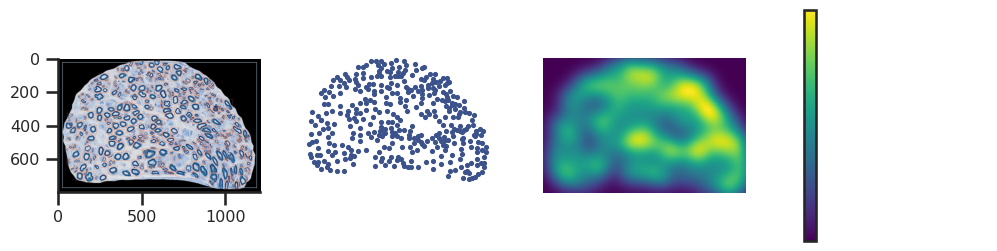

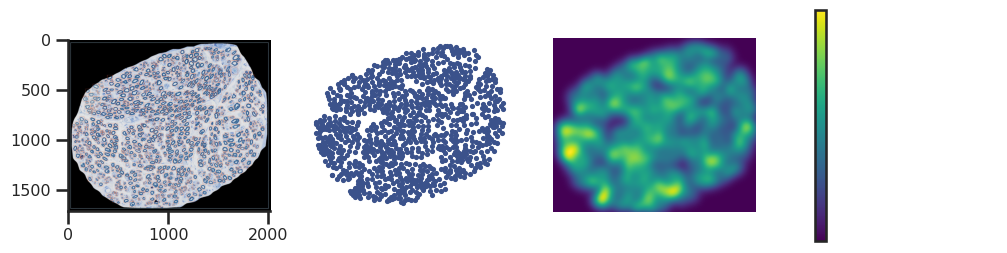

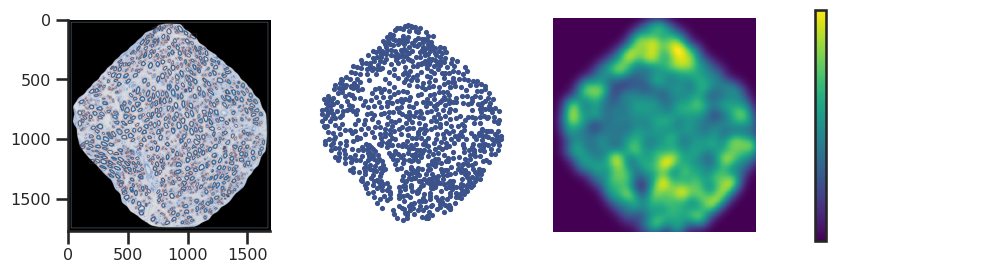

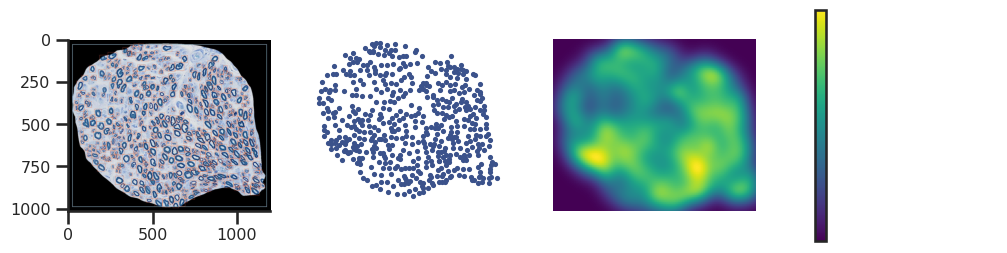

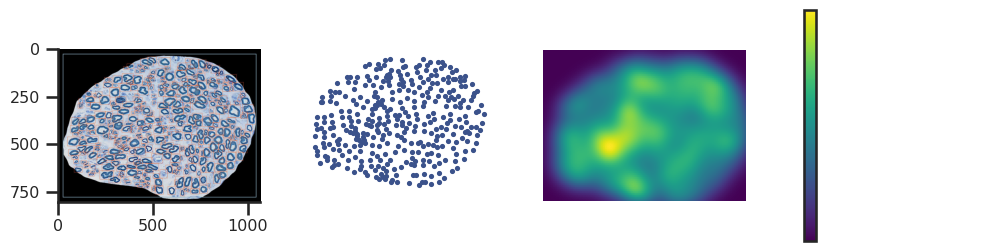

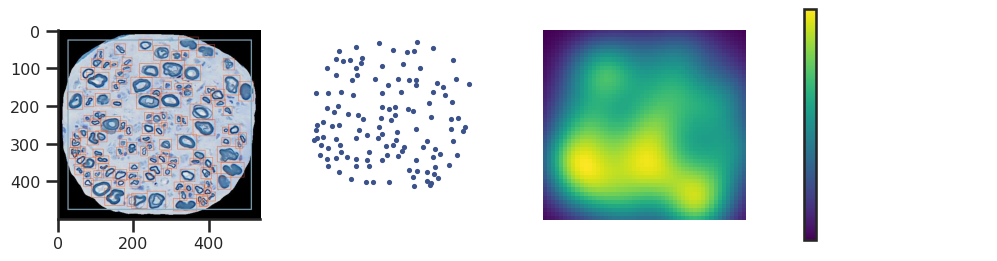

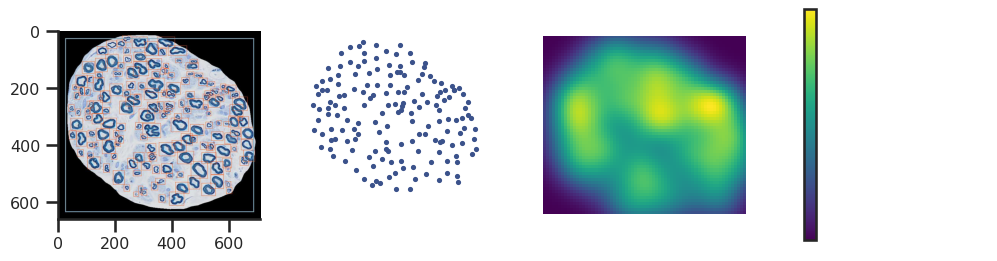

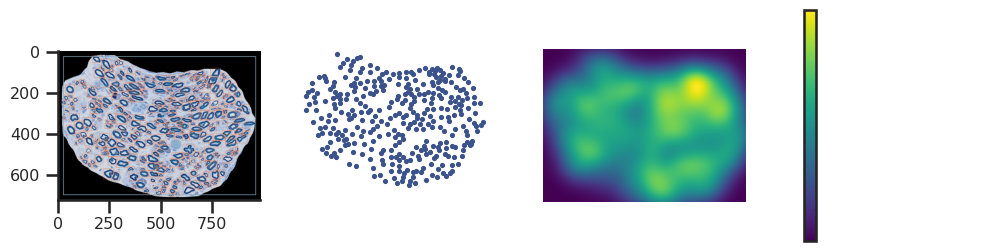

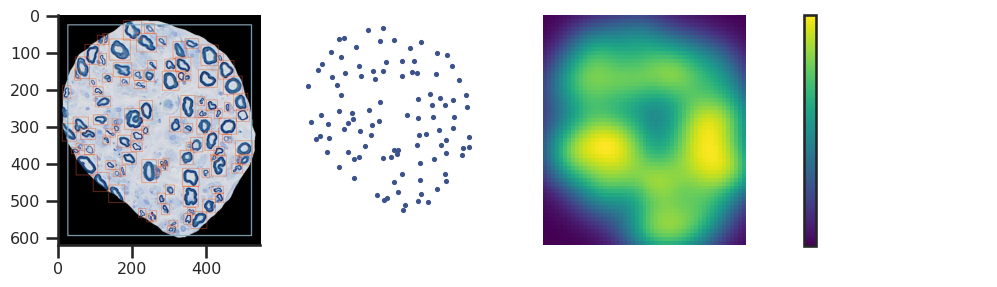

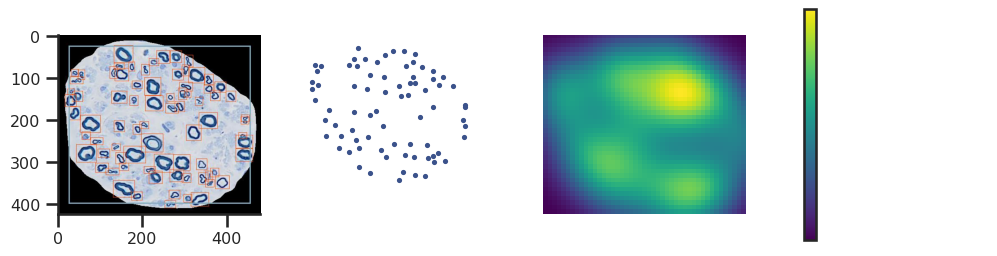

In [32]:
# down scale to 1/10 to compute fast
df_fib['x'] = (df_fib['xmin'] + df_fib['xmax']) / 20
df_fib['y'] = (df_fib['ymin'] + df_fib['ymax']) / 20

df_fas_rm['NND'] = np.nan
df_fas_rm['KDE_entropy'] = np.nan
for idx in range(len(df_fas_rm)):
    data = df_fib[(df_fib['n_fas']==idx)].dropna(subset=['x', 'y'])
    data = data[['x', 'y']]
    x = data['x']
    y = data['y']
    if len(data) < 10:
        continue

    # Calculate nearest neighbor distances
    distances = distance.cdist(data, data)
    nnd = np.min(np.ma.masked_array(distances, mask=np.eye(len(data))), axis=1)
    # Find the minimum distance for each point
    masked_distances = np.ma.masked_array(distances, mask=np.eye(len(data)))
    nearest_distances = masked_distances.min(axis=1)
    # Calculate the mean nearest neighbor distance
    mean_nnd = nearest_distances.mean() * 10 * scale # um
    df_fas_rm['NND'][idx] =  mean_nnd
    print(f"Mean Nearest Neighbor Distance: {mean_nnd:.2f} um")


    # Perform kernel density estimation
    bandwidth = 5  # note that 1/10 scale to original pixel
    kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
    kde.fit(data)

    # Evaluate the KDE on the grid
    grid_size = 1
    grid_x, grid_y = np.mgrid[0:x.max():grid_size, 0:y.max():grid_size]
    grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))
    log_density = kde.score_samples(grid_points)
    density = np.exp(log_density)

    # Calculate the entropy of the KDE distribution
    entropy_value = entropy(density)
    df_fas_rm['KDE_entropy'][idx] =  entropy_value
    print(f"Entropy: {entropy_value:.2f}")

    # Plot and save the spatial distribution and KDE images.
    fig, ax = plt.subplots(1, 4, figsize=(12, 3))
    img = Image.open(f'{save_dir}/fascicles/fascicle_{idx:03}_bbox.jpg')
    ax[0].imshow(img)
    ax[1].set_aspect('equal')

    ax[1].scatter(x, y, s=5)
    ax[1].set_xlim(0, x.max()+10)
    ax[1].set_ylim(0, y.max()+10)
    ax[1].invert_yaxis()
    ax[1].axis('off')
    ax[1].set_aspect('equal')

    im = ax[2].imshow(density.reshape(grid_x.shape).T, origin='lower', cmap='viridis')
    ax[2].invert_yaxis()
    ax[2].axis('off')
    ax[2].set_aspect('equal')

    # Add a colorbar for the kernel density estimation plot.
    cbar = fig.colorbar(im, ax=ax[3], pad=0.05, location='left')
    cbar.set_ticks([])
    ax[3].axis('off')
    plt.savefig(f'{save_dir}/fascicles/fascicle_{idx:03}_kde.jpg')

# Calculate expected nearest neighbor distance and Nearest Neighbor Index (NNI).
df_fas_rm['expected_nnd'] = 1 / (2 * np.sqrt(df_fas_rm['n_fib'] / (df_fas_rm['area'] * 1000000)))  # Expected NND in µm.
df_fas_rm['NNI'] = df_fas_rm['NND'] / df_fas_rm['expected_nnd']  # Ratio of observed to expected NND.

Mean Nearest Neighbor Distance: 6.99 um
Entropy: 7.39


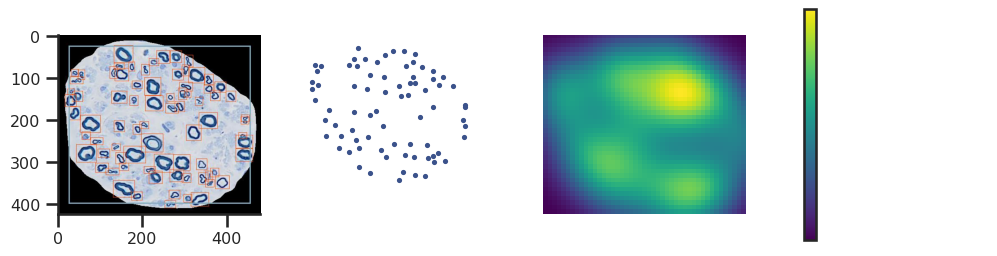

In [33]:

# Calculate and print nearest neighbor distances for the selected fascicle.
distances = distance.cdist(data, data)
nnd = np.min(np.ma.masked_array(distances, mask=np.eye(len(data))), axis=1)
mean_nnd = nnd.mean() * 10 * scale  # Convert to µm.
df_fas_rm['NND'][idx] = mean_nnd
print(f"Mean Nearest Neighbor Distance: {mean_nnd:.2f} um")

# Perform and evaluate kernel density estimation for the selected fascicle.
bandwidth = 5  # Bandwidth for KDE.
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(data)
grid_size = 1
grid_x, grid_y = np.mgrid[0:x.max():grid_size, 0:y.max():grid_size]
grid_points = np.column_stack((grid_x.ravel(), grid_y.ravel()))
log_density = kde.score_samples(grid_points)
density = np.exp(log_density)

# Calculate and print the entropy of the KDE distribution.
entropy_value = entropy(density)
df_fas_rm['KDE_entropy'][idx] = entropy_value
print(f"Entropy: {entropy_value:.2f}")

# Plot and save the spatial distribution and KDE for the selected fascicle.
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
img = Image.open(f'{save_dir}/fascicles/fascicle_{idx:03}_bbox.jpg')
ax[0].imshow(img)
ax[1].set_aspect('equal')

ax[1].scatter(x, y, s=5)
ax[1].set_xlim(0, x.max() + 10)
ax[1].set_ylim(0, y.max() + 10)
ax[1].invert_yaxis()
ax[1].axis('off')
ax[1].set_aspect('equal')

im = ax[2].imshow(density.reshape(grid_x.shape).T, origin='lower', cmap='viridis')
ax[2].invert_yaxis()
ax[2].axis('off')
ax[2].set_aspect('equal')

# Add a colorbar for the KDE plot.
cbar = fig.colorbar(im, ax=ax[3], pad=0.05, location='left')
cbar.set_ticks([])
ax[3].axis('off')
plt.savefig(f'{save_dir}/fascicles/fascicle_{idx:03}_kde.jpg')


In [34]:
# Displaying minimum, maximum, and mean density values for the KDE.
density.min(), density.max(), density.mean()

(9.569225972934425e-06, 0.0009640076892073639, 0.00048642781166757294)

In [35]:
# Saving the revised nerve, fascicle, and fiber data to CSV files.
df_nerve_rm.to_csv(f'{save_dir}/df_nerve_rm.csv')
df_fas_rm.to_csv(f'{save_dir}/df_fas_rm.csv')
df_fib_rm.to_csv(f'{save_dir}/df_fib_rm.csv')

In [36]:
# Uncomment to unassign resources in Google Colab when finished.
# from google.colab import runtime
# runtime.unassign()